In [ ]:
# Decision Tree
# Conny Lin | June 13, 2020

In [1]:
# import local libraries using host specific paths
import socket, sys
hostname = socket.gethostname().split('.')[0]
# set local path settings based on computer host
if hostname == 'PFC':
    pylibrary = '/Users/connylin/Dropbox/Code/proj'
elif hostname == 'Angular-Gyrus':
    pylibrary = '/Users/connylin/Code/proj'
else:
    assert False, 'host computer not regonized'
# load local libraries
if pylibrary not in sys.path:
    sys.path.insert(1, pylibrary)
# import brainstation_capstone
# import other standard paths and local variables
from brainstation_capstone.system import host_paths
localpaths = host_paths.get(hostname)
datapath = localpaths['datapath']

# import standard libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# get standard machine learning input data
from brainstation_capstone.etl.datatransform import Nutcracker
X_train, X_test, y_train, y_test = Nutcracker(datapath).mldata(feature_reduction='None')

getting host computer specific paths
None
None


https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
# test set up
n_max_depth = 10
# Instantiate the model & fit it to our data
MLmodel = DecisionTreeClassifier(max_depth=n_max_depth)
MLmodel.fit(X_train, y_train)
# Score the model on the test set
train_score = MLmodel.score(X_train,y_train)
test_score = MLmodel.score(X_test,y_test)

In [7]:
print(f"The TRAIN classification accuracy is:  {train_score:.5f}")
print(f"The TEST classification accuracy is:  {test_score:.5f}")

The TRAIN classification accuracy is:  0.87067
The TEST classification accuracy is:  0.86579


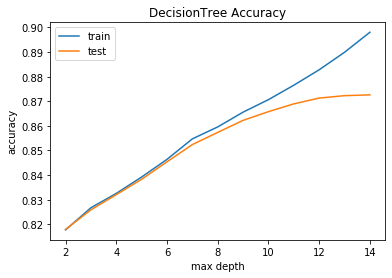

In [9]:
random_state = 318
# try some depths values
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Decision Tree -  data

train_accs = []
test_accs = []
depth_values = list(range(2,15))

# Loop over different max_depths
for d in depth_values:
    # Instantiate & fit
    my_dt = DecisionTreeClassifier(max_depth=d, random_state=random_state)
    my_dt.fit(X_train, y_train)
    
    # Evaluate on train & test data
    train_accs.append( my_dt.score(X_train, y_train) )
    test_accs.append( my_dt.score(X_test, y_test) )
    
    
# Plot the results
plt.figure()
plt.plot(depth_values, train_accs, label='train')
plt.plot(depth_values, test_accs, label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('DecisionTree Accuracy')
plt.show()

max depth over 6-8 starts to overtrain.

In [11]:
test_accs

[0.8179225,
 0.8258825,
 0.8320525,
 0.8382925,
 0.8454025,
 0.852405,
 0.857355,
 0.8622375,
 0.8657875,
 0.8689475,
 0.8713025,
 0.872285,
 0.872615]

Use gridsearchcv to tune 

In [ ]:
# example of grid searching key hyperparametres for ridge classifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# define models and parameters
model = DecisionTreeClassifier()
max_depth = np.arange(1,32)
min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
max_features = list(range(1,X_train.shape[1]))
random_state = [318]

grid = dict(max_depth=max_depth, min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features, random_state=random_state)

# import data
from brainstation_capstone.etl.datatransform import Nutcracker
X_train, _, y_train, _ = Nutcracker(datapath).mldata(feature_reduction='None')

# grid search setting
cv = 5 #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           cv=cv, scoring='accuracy',error_score=0, verbose=3)
# run gridsearch
grid_result = grid_search.fit(X_train, y_train)

# summarize results
from brainstation_capstone.ml import GridSearchCVHelper
mean, stdev, param = GridSearchCVHelper.print_summary(grid_result)
print('done')

None
None
Fitting 5 folds for each of 31000 candidates, totalling 155000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 99.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 148.7min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 174.8min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 209.2min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 235.5min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed: 251.2min


In [ ]:
# visualize tree
# summarize results
from brainstation_capstone.ml import GridSearchCVHelper
mean, stdev, param = GridSearchCVHelper.print_summary(grid_result)
print('done')